In [11]:
import tensorflow  as tf
from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory

In [13]:
train_dir = "/Users/ahnafchowdhury/Downloads/chest_xray/train"
test_dir = "/Users/ahnafchowdhury/Downloads/chest_xray/test"
val_dir = "/Users/ahnafchowdhury/Downloads/chest_xray/val" 

In [41]:
train_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',       
    label_mode='int',        
    image_size=(150, 150),   
    batch_size=32          
)

Found 5216 files belonging to 2 classes.


In [51]:
test_dataset = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(150, 150),
    batch_size=32
)

Found 624 files belonging to 2 classes.


In [55]:
from tensorflow.keras import layers, models

# Define a CNN model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: NORMAL (0) or PNEUMONIA (1)
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
    metrics=['accuracy']
)

In [59]:
history = cnn.fit(
    train_dataset,               # Training data
    epochs=10                    # Number of epochs
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 206ms/step - accuracy: 0.8533 - loss: 0.3831
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9555 - loss: 0.1210
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 35s 215ms/step - accuracy: 0.9687 - loss: 0.0833
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 207ms/step - accuracy: 0.9745 - loss: 0.0765
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 204ms/step - accuracy: 0.9838 - loss: 0.0517
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 208ms/step - accuracy: 0.9776 - loss: 0.0612
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 35s 212ms/step - accuracy: 0.9893 - loss: 0.0306
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9941 - loss: 0.0182
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 204ms/step - accuracy: 0.9932 - loss: 0.0214
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 33s 203ms/step - accuracy: 0.9891 - loss: 0.0320


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


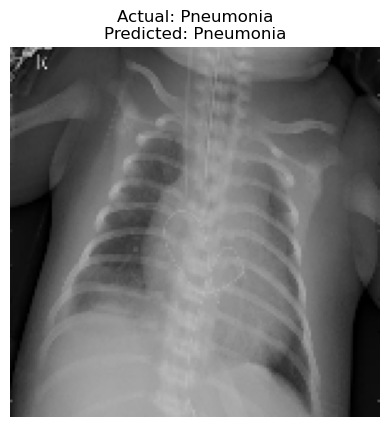

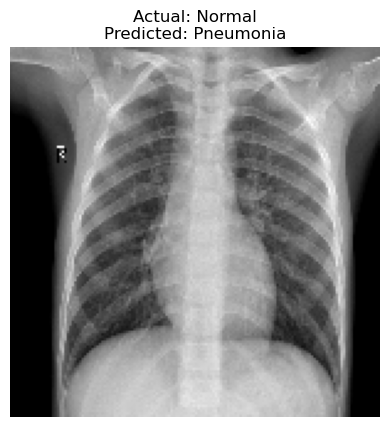

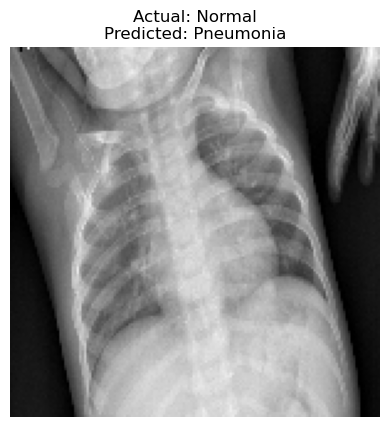

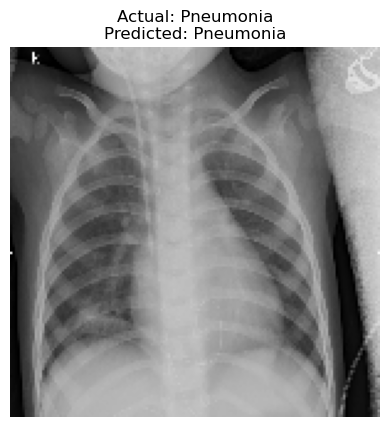

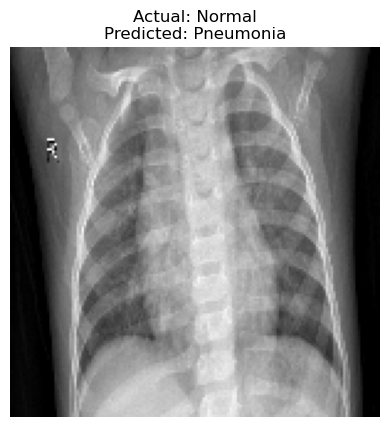

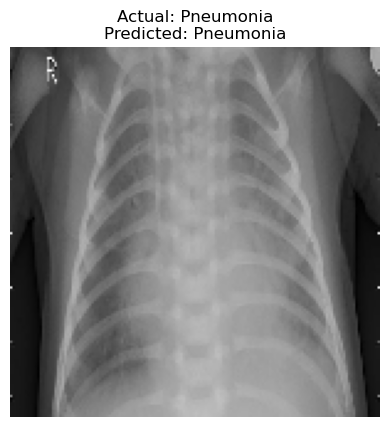

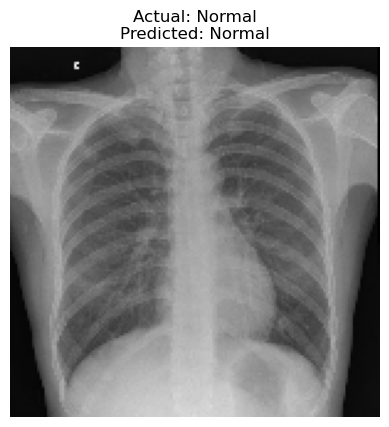

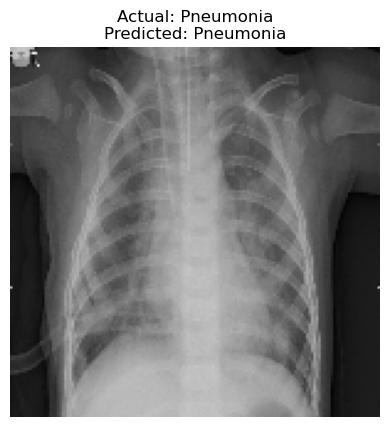

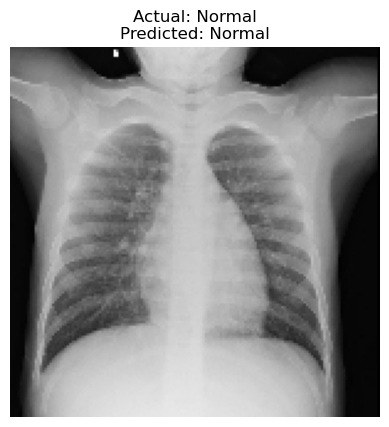

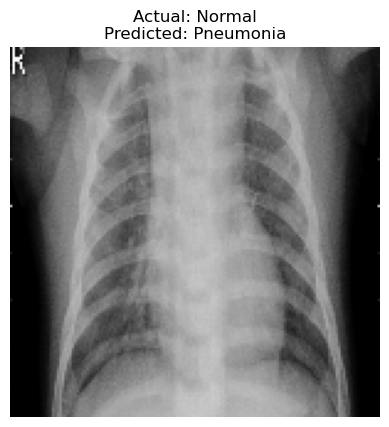

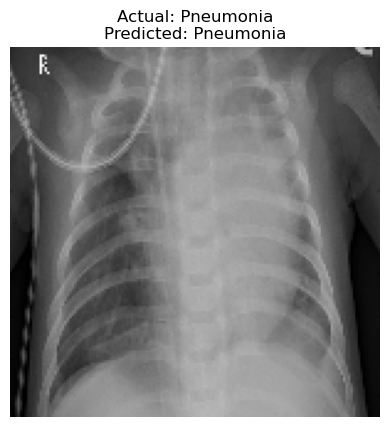

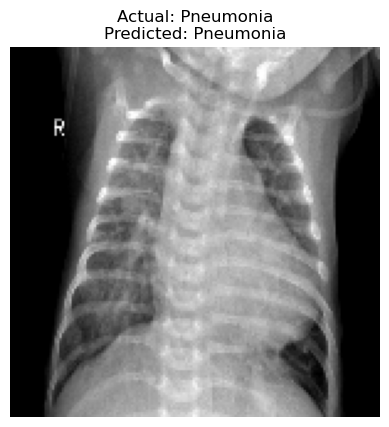

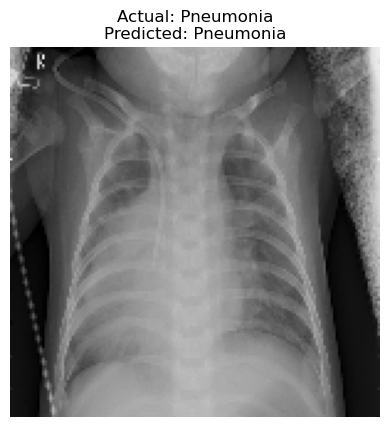

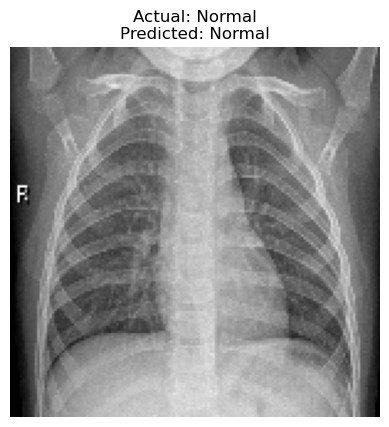

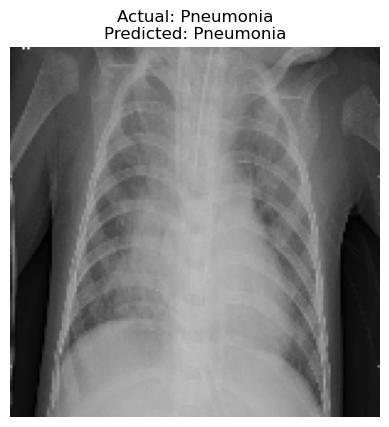

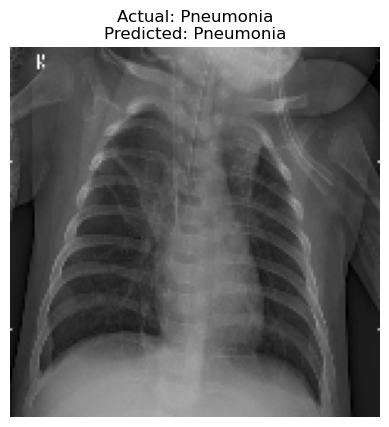

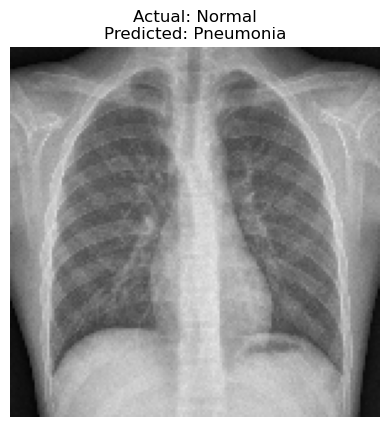

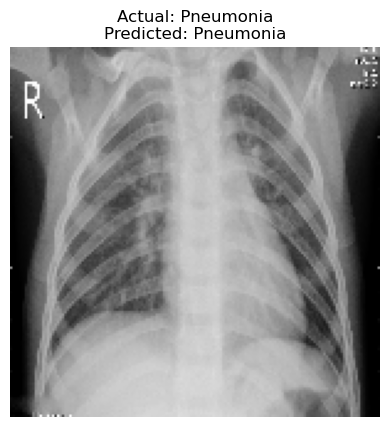

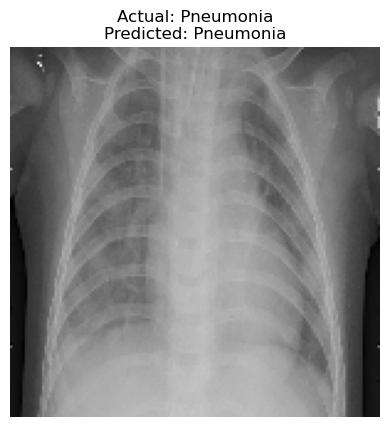

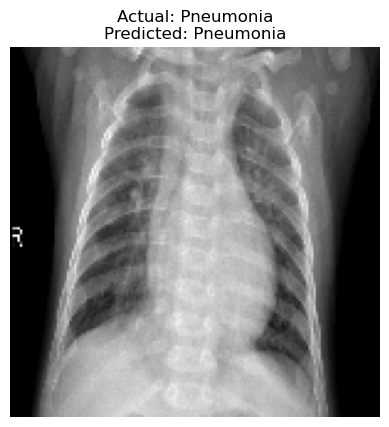

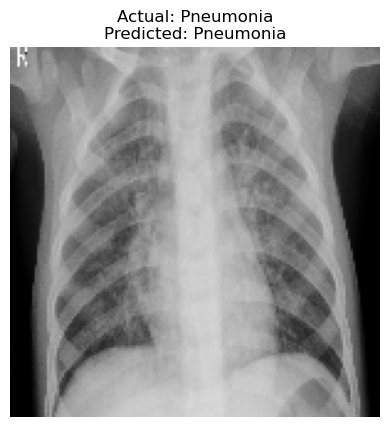

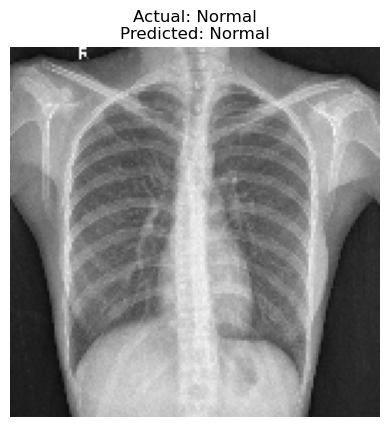

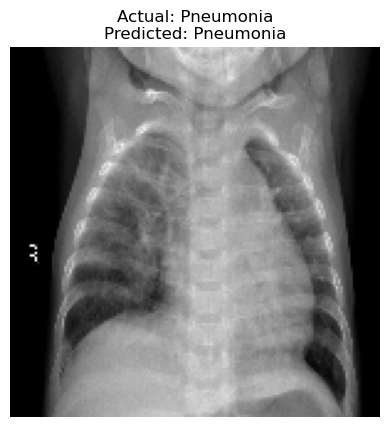

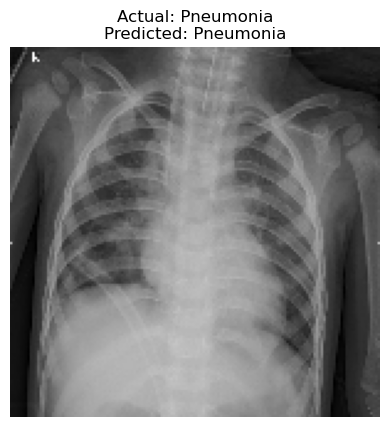

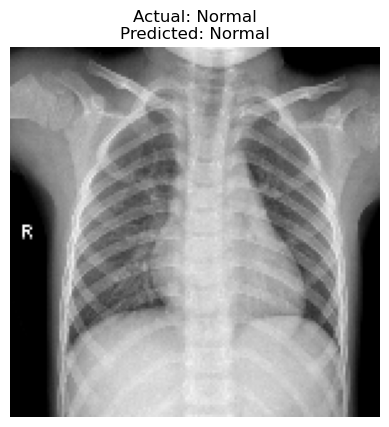

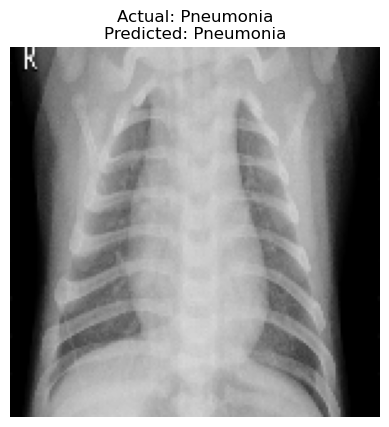

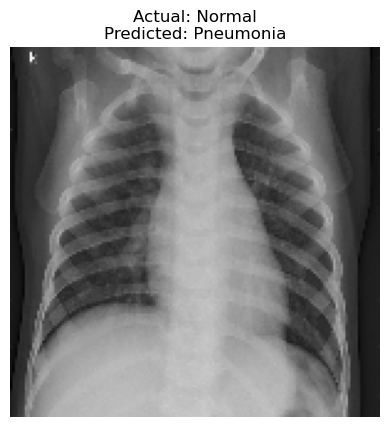

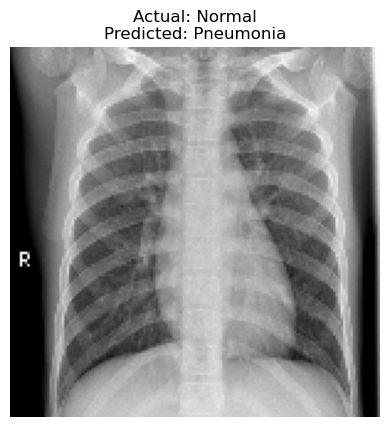

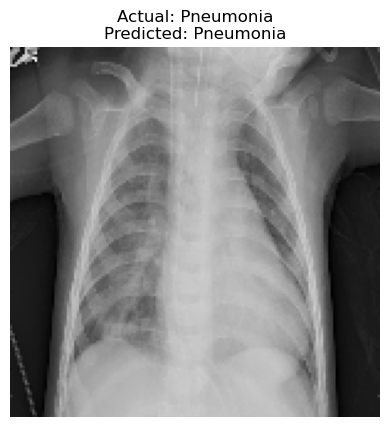

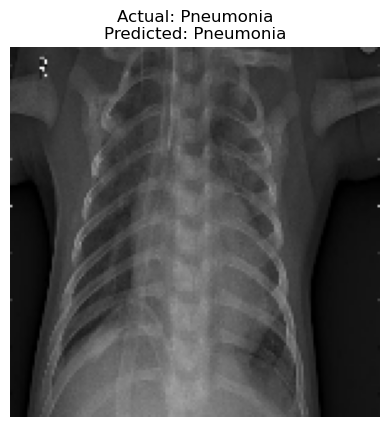

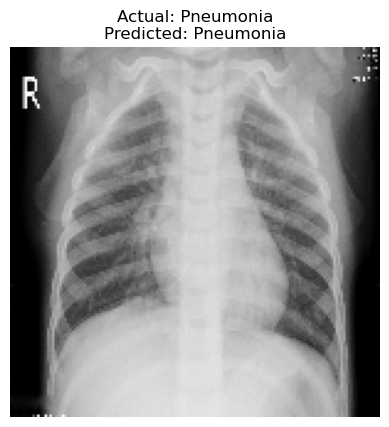

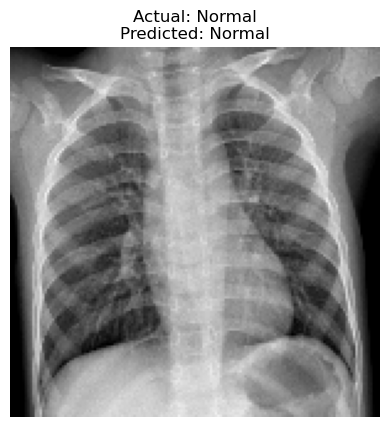

2024-12-21 01:02:59.760298: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [61]:
for images, labels in test_dataset.take(1):  # Take one batch of test data
    predictions = cnn.predict(images)
    for i in range(len(images)):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual: {'Pneumonia' if labels[i] == 1 else 'Normal'}\n"
                  f"Predicted: {'Pneumonia' if predictions[i][0] > 0.5 else 'Normal'}")
        plt.axis("off")
        plt.show()

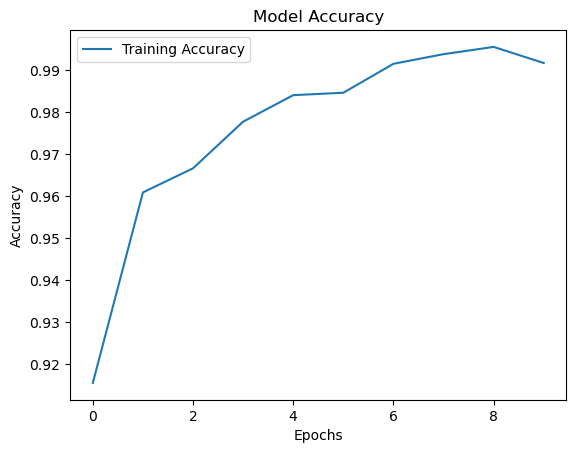

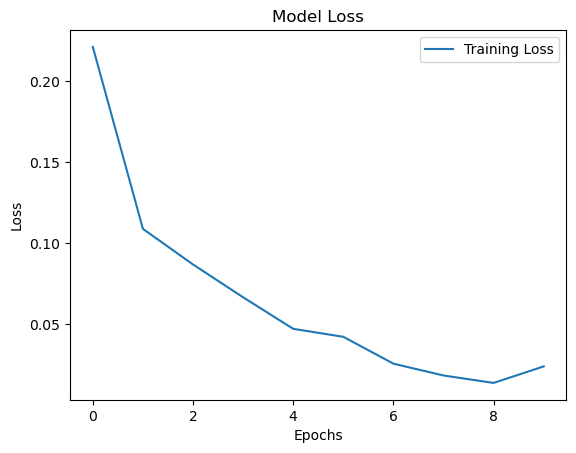

In [63]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


2024-12-21 01:31:30.573229: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


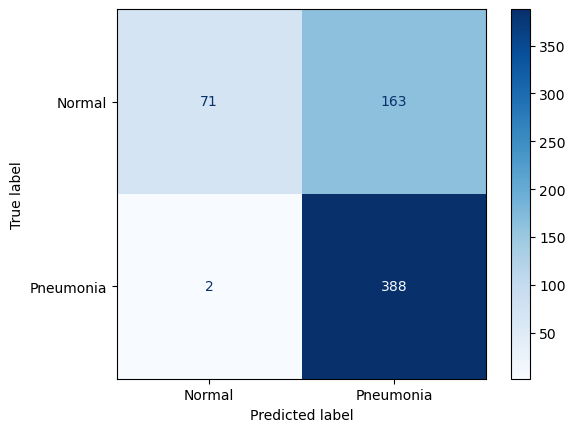

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []
for images, labels in test_dataset:
    predictions = cnn.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((predictions > 0.5).astype("int").flatten())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Pneumonia"])
disp.plot(cmap="Blues")
plt.show()